# Solution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from solvers import solver

## Implementation

Using the [Lotka-Volterra](https://mathworld.wolfram.com/Lotka-VolterraEquations.html) equations, we can define a predator-prey model to show simulations of methods: Euler, Heun and Runge-Kutta.


In [ ]:
# Define functions

# Create the predator-prey model
def pp_model(t, y, alpha, beta, gamma, delta, f, g):
    return np.array([alpha * y[0] - beta * y[0] * y[1] + f(t), delta * y[0] * y[1] - gamma * y[1] + g(t)])

# Get the results after using the given method
def calculate_method(rhs, x0, T, time_steps, method, *args):
    results = {}
    for dt in time_steps:
        t, y = solver(rhs, x0, 0.0, dt, T, method, *args)
        results[dt] = {'time': t, 'population': np.array(y)}
    return results

# Create euler method
def euler_method(rhs, y0, t0, dt, T, *args):
    t_values = [t0]
    y_values = [y0]
    
    # Unpack additional arguments for the RHS function
    alpha, beta, gamma, delta, f, g = args
    
    # Make a copy of the time step list
    dt_list = list(dt) if isinstance(dt, (list, tuple)) else [dt]

    # Execute until final time or time steps are exhausted
    while t_values[-1] < T and dt_list:
        
        # Get the next time step
        current_dt = dt_list.pop(0)
        
        # Calculate next time step
        t_next = t_values[-1] + current_dt
        
        # Use Euler method to calculate next y value
        y_next = y_values[-1] + current_dt * rhs(t_values[-1], y_values[-1], *args)

        # Add new time and solution to list
        t_values.append(t_next)
        y_values.append(y_next)

    # Return the results as array
    return np.array(t_values), np.array(y_values)

# Create the graph with plottings
def plot_results(results, title):
    
    # Sizing of graph
    plt.figure(figsize=(8, 4))
    
    # Plot the results
    for dt, data in results.items():
        plt.plot(data['time'], data['population'][:, 0], label=f'Prey - Dt = {dt:.4f}')
        plt.plot(data['time'], data['population'][:, 1], label=f'Predator - Dt = {dt:.4f}')
    
    # Ensure graph is readable
    plt.title(f'Predator-Prey Model - {title}')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define test cases and conditions 
alpha_a, beta_a, gamma_a, delta_a = 1, 1, 1, 1
alpha_b, beta_b, gamma_b, delta_b = 2/3, 4/3, 1, 1
f_a = lambda t: -np.sin(t) - (np.cos(t))**2 - np.cos(t)
g_a = lambda t: np.sin(t) + (np.cos(t))**2 - np.cos(t)
f_b = lambda t: 0
g_b = lambda t: 0
x0_a, y0_a = 2, 0
x0_b, y0_b = 0.9, 0.9
T_a, T_b = 2.5 * np.pi, 30
dts_a = [T_a / 100, T_a / 200, T_a / 400, T_a / 800, T_a / 1600]
dts_b = [T_b / 100, T_b / 200, T_b / 400, T_b / 800, T_b / 1600]

## Results


The graphs below show the results after simulation of the Runge-Kutta, Heun and Euler's methods using conditions given for both test cases A and B.


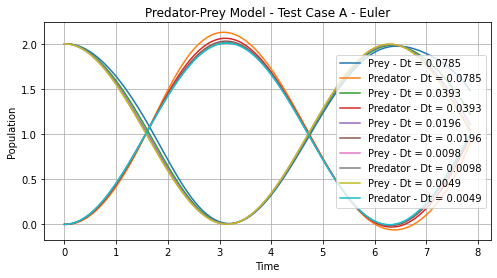

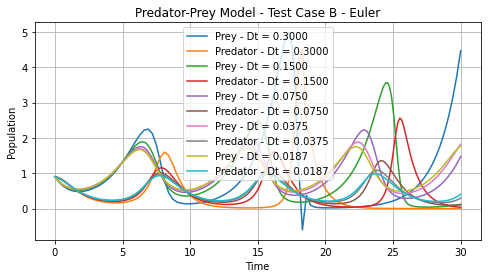

In [ ]:
# Plot results using your Euler method
results_a_euler = euler_method(pp_model(t, y, alpha_a, beta_a, gamma_a, delta_a, f_a, g_a), np.array([x0_a, y0_a]), 0.0, dts_a, T_a, alpha_a, beta_a, gamma_a, delta_a, f_a, g_a)
results_b_euler = euler_method(pp_model(t, y, alpha_b, beta_b, gamma_b, delta_b, f_b, g_b), np.array([x0_b, y0_b]), 0.0, dts_b, T_b, alpha_b, beta_b, gamma_b, delta_b, f_b, g_b)

# Plot results
plot_results(results_a_euler, 'Test Case A - Euler')
plot_results(results_b_euler, 'Test Case B - Euler')


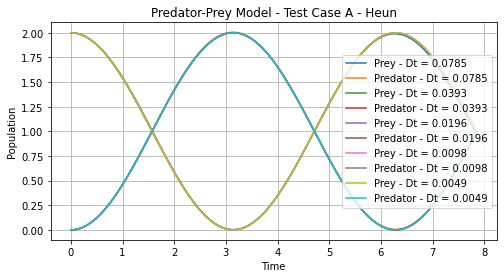

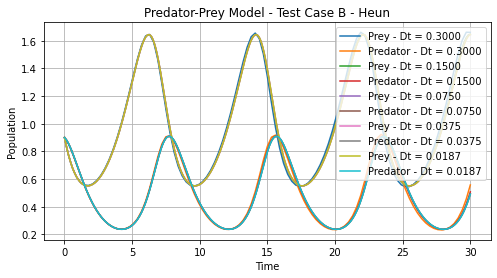

In [ ]:
plot_results(calculate_method(lambda t, y: pp_model(t, y, alpha_a, beta_a, gamma_a, delta_a, f_a, g_a),
                            np.array([x0_a, y0_a]), T_a, dts_a, 'Heun'), 'Test Case A - Heun')
plot_results(calculate_method(lambda t, y: pp_model(t, y, alpha_b, beta_b, gamma_b, delta_b, f_b, g_b),
                            np.array([x0_b, y0_b]), T_b, dts_b, 'Heun'), 'Test Case B - Heun')

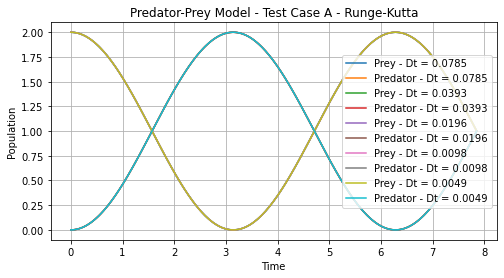

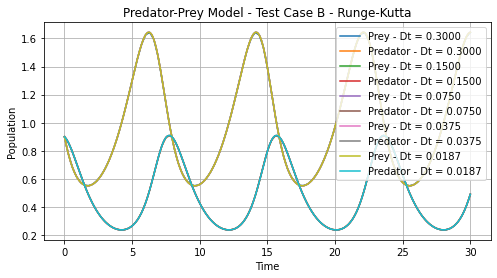

In [ ]:
plot_results(calculate_method(lambda t, y: pp_model(t, y, alpha_a, beta_a, gamma_a, delta_a, f_a, g_a),
                            np.array([x0_a, y0_a]), T_a, dts_a, 'Runge-Kutta'), 'Test Case A - Runge-Kutta')
plot_results(calculate_method(lambda t, y: pp_model(t, y, alpha_b, beta_b, gamma_b, delta_b, f_b, g_b),
                            np.array([x0_b, y0_b]), T_b, dts_b, 'Runge-Kutta'), 'Test Case B - Runge-Kutta')

## Analysis

After simulating the methods of Euler, Heun and Runge-Kutta using the conditions given, graphs were plotted to show their accuracy and efficiency.

#### Euler's Method:
Euler's method is the simplest and cheapest method out of the three. However, due to its simplicity, when testing with larger step times, it is clear the method produces results that deviate from the exact solution. This is proven from the graph of test case B, where the population curve and exact solution is splitting away from each other showing the method's lack of accuracy.

#### Heun's Method:
Although Heun's method is one of the most basic ordinary differential equations (ODE) solvers that uses the [predictor-corrector method](<https://math.libretexts.org/Bookshelves/Differential_Equations/Numerically_Solving_Ordinary_Differential_Equations_(Brorson)/01%3A_Chapters/1.04%3A_Predictor-corrector_methods_and_Runge-Kutta>), it is still an improvement to Euler's method in both accuracy and efficiency. The simulations show minimal deviations between the method's result and exact solution proving a furtherance in accuracy over Euler's.


#### Runge-Kutta's Method:
Runge-Kutta's method proves to be the most accurate where it is difficult to differentiate the method's result and the exact solution from the graphs. Even though this method requires more computational resources, the accuracy the method delivers ensures better results even for complex simulations.

The results show the differences in the method's accuracy depending on its cost and efficiency. When the efficiency and cost is favoured, Euler and Heun's method is an appropriate approach. Contrastly, the Runge-Kutta method is a dependable option for predator-prey models when higher accuracy is desired.

## Conclusion

From the three methods used of Euler's, Heun's and Runge-Kutta's, the simulations and results produces valuable insight to their pros and cons. Each method has different strengths and limitations that tailor towards different requirements for solving their predator-prey models.

Euler's method is less suitable for creating a more complex predator-prey model as it uses less computational resources than others. The rapid simulations this method allows, sacrifices the quality of accuracy it produces which is why the simplicity makes it useful for illustrative purposes. Therefore, coming to a conclusion that the decrease in step size improves the accuracy of [Euler's method](https://math.libretexts.org/Bookshelves/Differential_Equations/Elementary_Differential_Equations_with_Boundary_Value_Problems_(Trench)/03%3A_Numerical_Methods/3.01%3A_Euler's_Method). While Heun's method is not the most accurate in the list, it is the balance between accuracy and computational efficiency. When it comes to a larger step size, the Heun's method becomes an appropriate choice for its use of two tangents which both over and underestimates. Moreover, when it comes to smooth functions  and simple [nonlinear systems](https://www.solver.com/courses/optimization/module-5/nonlinear-non-smooth-models), this method is preferred as the Runge-Kutta would be too costly for it. However, Runge-Kutta is the most reliable and excels when accuracy is prioritised. This is because the Runge-Kutta method uses more evaluations and intermediate steps for each time step resulting in a more accurate prediction for each time step.

While the Runge-Kutta method uses more resources, it does produce a much more accurate result. The method of choice depends on the specific requirements where accuracy and efficiency needs to be taken into consideration. As suggested throughout, Runge-Kutta will produce the most accurate result but will cost more. Heun's method would be the intermediary choice, while Euler's method is the simplest and least costly.